<a href="https://colab.research.google.com/github/Abd-elr4hman/DeepLearning/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

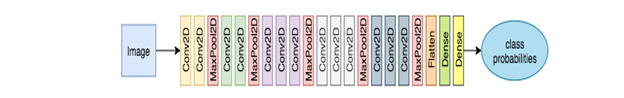

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt

In [ ]:

class Block(tf.keras.Model):
    def __init__(self, filters, kernel_size, repetitions, pool_size=2, strides=2):
        super(Block, self).__init__()
        self.filters = filters
        self.kernel_size = kernel_size
        self.repetitions = repetitions
        
        # Define a conv2D_0, conv2D_1, etc based on the number of repetitions
        for i in range(self.repetitions):
            
            # Define a Conv2D layer, specifying filters, kernel_size, activation and padding.
            vars(self)[f'conv2D_{i}'] = tf.keras.layers.Conv2D(filters, kernel_size, activation='relu', padding='same')
        
        # Define the max pool layer 
        self.max_pool = tf.keras.layers.MaxPooling2D(pool_size, strides)
  
    def call(self, inputs):
        # access the class's conv2D_0 layer
        conv2D_0 = self.conv2D_0
        
        # Connect the conv2D_0 layer to inputs
        x = conv2D_0(inputs)

        # for the remaining conv2D_i layers from 1 to `repetitions` they will be connected to the previous layer
        for i in range(1,self.repetitions):
            # access conv2D_i.
            conv2D_i = vars(self)[f'conv2D_{i}']
            
            # Use the conv2D_i and connect it to the previous layer
            x = conv2D_i(x)

        # add the max_pool layer
        max_pool = tf.keras.layers.MaxPooling2D()(x)
        
        return max_pool

In [ ]:

class MyVGG(tf.keras.Model):

    def __init__(self, num_classes):
        super(MyVGG, self).__init__()

        # Creating blocks of VGG with the following 
        # (filters, kernel_size, repetitions) configurations
        self.block_a = Block(filters=64, kernel_size=3, repetitions=2)
        self.block_b = Block(filters=128, kernel_size=3, repetitions=2)
        self.block_c = Block(filters=256, kernel_size=3, repetitions=3)
        self.block_d = Block(filters=512, kernel_size=3, repetitions=3)
        self.block_e = Block(filters=512, kernel_size=3, repetitions=3)

        # Classification head
        # Define a Flatten layer
        self.flatten = tf.keras.layers.Flatten()
        # Create a Dense layer with 256 units and ReLU as the activation function
        self.fc = tf.keras.layers.Dense(units=256,activation='relu')

        # add the softmax classifier
        self.classifier =  tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        # Chain all the layers one after the other
        x = self.block_a(inputs)
        x = self.block_b(x)
        x = self.block_c(x)
        x = self.block_d(x)
        x = self.block_e(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.classifier(x)
        return x

In [ ]:
# Initialize VGG with the number of classes 
vgg = MyVGG(num_classes=2)

In [ ]:
vgg.build((1, 224, 224, 3))
#vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "my_vgg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block (Block)                multiple                  0         
_________________________________________________________________
block_1 (Block)              multiple                  0         
_________________________________________________________________
block_2 (Block)              multiple                  0         
_________________________________________________________________
block_3 (Block)              multiple                  0         
_________________________________________________________________
block_4 (Block)              multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  64227

In [ ]:
dataset = tfds.load('cats_vs_dogs', split=tfds.Split.TRAIN, data_dir='data/')

# Initialize VGG with the number of classes 
vgg = MyVGG(num_classes=2)

# Compile with losses and metrics
vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define preprocessing function
def preprocess(features):
    # Resize and normalize
    image = tf.image.resize(features['image'], (224, 224))
    return tf.cast(image, tf.float32) / 255., features['label']

# Apply transformations to dataset
dataset = dataset.map(preprocess).batch(32)

# Train the custom VGG model
history=vgg.fit(dataset, epochs=10)

Epoch 1/10
727/727 [==============================] - 87s 119ms/step - loss: 0.6861 - accuracy: 0.5528
Epoch 2/10
727/727 [==============================] - 89s 123ms/step - loss: 0.6533 - accuracy: 0.6262
Epoch 3/10
727/727 [==============================] - 90s 123ms/step - loss: 0.6222 - accuracy: 0.6582
Epoch 4/10
727/727 [==============================] - 91s 125ms/step - loss: 0.6047 - accuracy: 0.6735
Epoch 5/10
727/727 [==============================] - 91s 125ms/step - loss: 0.5938 - accuracy: 0.6824
Epoch 6/10
727/727 [==============================] - 89s 122ms/step - loss: 0.5855 - accuracy: 0.6896
Epoch 7/10
727/727 [==============================] - 90s 123ms/step - loss: 0.5783 - accuracy: 0.6960
Epoch 8/10
727/727 [==============================] - 88s 121ms/step - loss: 0.5717 - accuracy: 0.7020
Epoch 9/10
727/727 [==============================] - 89s 122ms/step - loss: 0.5654 - accuracy: 0.7072
Epoch 10/10
727/727 [==============================] - 92s 126ms/step - l

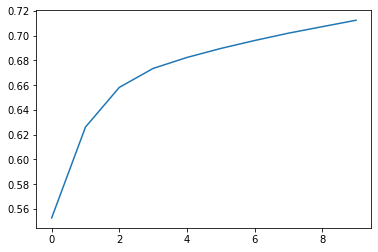

In [ ]:

#plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')

In [ ]:
vgg.summary()

Model: "my_vgg_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block_5 (Block)              multiple                  0         
_________________________________________________________________
block_6 (Block)              multiple                  0         
_________________________________________________________________
block_7 (Block)              multiple                  0         
_________________________________________________________________
block_8 (Block)              multiple                  0         
_________________________________________________________________
block_9 (Block)              multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  642